<a href="https://colab.research.google.com/github/elarchi2005/IA_2025/blob/main/Arboles_de_decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Agenda
1.Objetivo de estudio
2.exploraciond e datos EDA
3.limpieza de datos

5.entrenar el modelo arbol de decision
6.evaluamos el modelo

In [41]:
#tratamiento de deatos
import pandas as pd
import numpy as np
#gRAFICOS
import matplotlib.pyplot as plt
import seaborn as sns
#modelado
from sklearn.model_selection import train_test_split #Partir el dataset
from sklearn.tree import DecisionTreeRegressor #modelos
from sklearn.metrics import accuracy_score#dibujar arbol
from sklearn.tree import export_text
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

#OBJETIVO
cREAR Y EVALUAR UN MODELO DE ARBOL DE DECISION PARA PREDECIR LAS VENTA CON DATOS SIMULADOS DE UNA EMPRESA,DEPENDIENDO DE LAS INVERSIONES REALIZADAS EN PUBLICIDAD

In [42]:
datos=pd.read_csv("https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/Advertising_Web.csv")
datos.head()

,Unnamed: 0,X,TV,Radio,Newspaper,Web,Sales
0,1,1,230.1,37.8,69.2,306.634752,22.1
1,2,2,44.5,39.3,45.1,302.653070,10.4
2,3,3,17.2,45.9,69.3,49.498908,9.3
3,4,4,151.5,41.3,58.5,257.816893,18.5
4,5,5,180.8,10.8,58.4,195.660076,12.9


Relacion entre variables dependientes y inependientes

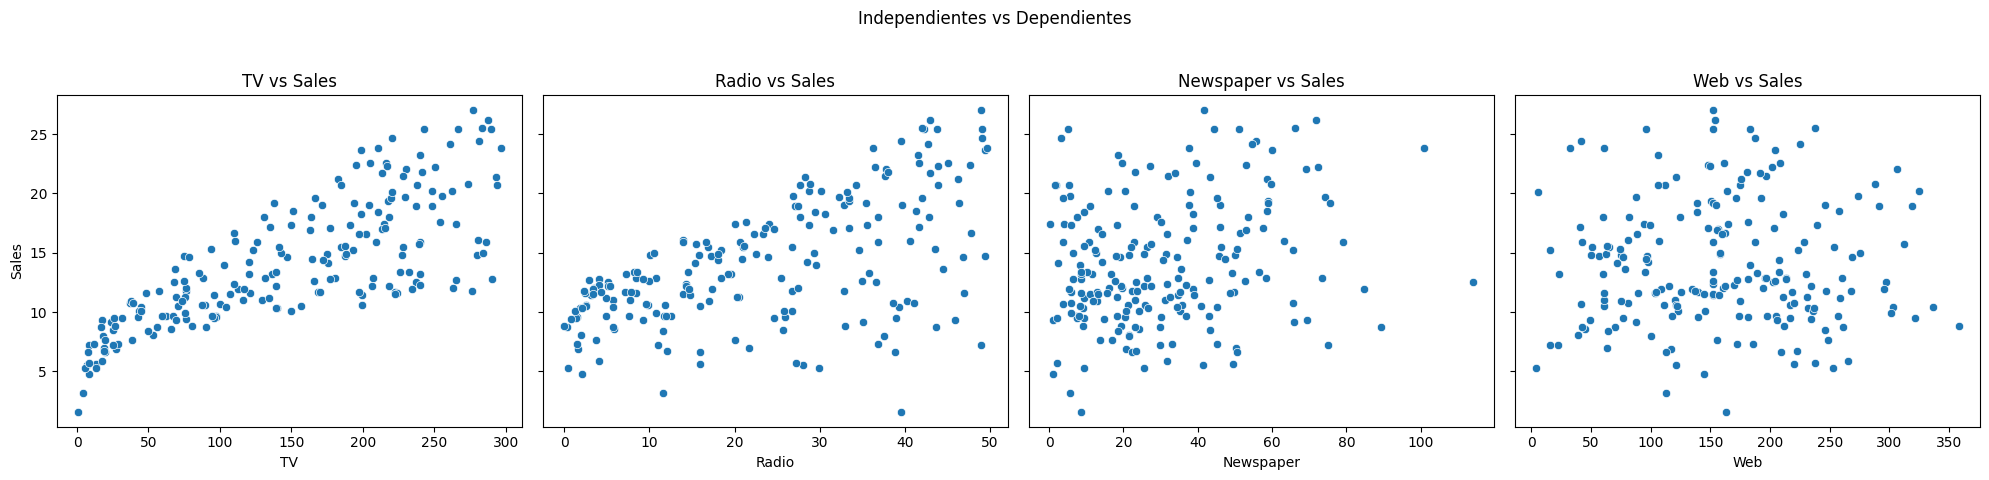

In [43]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
fig.suptitle('Independientes vs Dependientes')

sns.scatterplot(ax=axes[0], x=datos['TV'], y=datos['Sales'])
axes[0].set_title('TV vs Sales')

sns.scatterplot(ax=axes[1], x=datos['Radio'], y=datos['Sales'])
axes[1].set_title('Radio vs Sales')

sns.scatterplot(ax=axes[2], x=datos['Newspaper'], y=datos['Sales'])
axes[2].set_title('Newspaper vs Sales')

sns.scatterplot(ax=axes[3], x=datos['Web'], y=datos['Sales'])
axes[3].set_title('Web vs Sales')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Exploracion de datos EDA


In [44]:
print("Observaciones y variables:",datos.shape)


Observaciones y variables: (200, 7)


In [45]:
datos.dtypes

,0
Unnamed: 0,int64
X,int64
TV,float64
Radio,float64
Newspaper,float64
Web,float64
Sales,float64


In [46]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   X           200 non-null    int64  
 2   TV          200 non-null    float64
 3   Radio       200 non-null    float64
 4   Newspaper   200 non-null    float64
 5   Web         200 non-null    float64
 6   Sales       200 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 11.1 KB


Se describen como variables independientes TC, Radio, newspaper y web como variables dependiente Sales

Las varaibles independientes son:
*TV:Costos de publicidad en tv (miles de dolares)
* Radio:costos de publicidad inertidos en medios de difusion radio(miles de dolares).
*Newspaper costos publicitarios de medios impresos(miles de dolares)
*Web de costos publicitarios en herramientas digitales


In [47]:
datos.head()

,Unnamed: 0,X,TV,Radio,Newspaper,Web,Sales
0,1,1,230.1,37.8,69.2,306.634752,22.1
1,2,2,44.5,39.3,45.1,302.653070,10.4
2,3,3,17.2,45.9,69.3,49.498908,9.3
3,4,4,151.5,41.3,58.5,257.816893,18.5
4,5,5,180.8,10.8,58.4,195.660076,12.9


3.limpieza de datos

In [48]:
datos=datos[["TV","Radio","Newspaper","Web","Sales"]]
datos.describe()

,TV,Radio,Newspaper,Web,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,159.587355,14.022500
std,85.854236,14.846809,21.778621,76.815266,5.217457
min,0.700000,0.000000,0.300000,4.308085,1.600000
25%,74.375000,9.975000,12.750000,99.048767,10.375000
50%,149.750000,22.900000,25.750000,156.862154,12.900000
75%,218.825000,36.525000,45.100000,212.311848,17.400000
max,296.400000,49.600000,114.000000,358.247042,27.000000


4#. Datos de entrenamiento y datos de validación
(entrenamiento del modelo)
se empleara la semilla 1279 (random_State=2022)
los datos se distribuiran de la siguiente manera
*70% para entrenamiento
*30%para validacion del modelo

In [84]:
x_entrenamiento,x_validacion,y_entrenamiento,y_validacion=train_test_split(datos.drop("Sales",axis=1),datos["Sales"],train_size=.7,random_state=848149812)

In [85]:
from re import X
x_entrenamiento.shape,x_validacion.shape,y_entrenamiento.shape,y_validacion.shape

((140, 4), (60, 4), (140,), (60,))

##4.1 Modelando el Arbol de decision
la clase desiciontreeregressor del modulo sklearn.tree tiene los siguientes parametros:
* Max_depth:profundidad maxima que puede alcanzar el arbol.

* min_samples_split:numero minimio de observaciones que debe detener el nodo para que pueda dividirse.si es un valor decimal se interpreta como la fracion total de observaciones de entrenamiento ceil(min_sampls_split*n_samples).

 * min_samples_leaf:numero minimo de observaciones que debe tener cada uno de los nodos hijos para que se produzca la division,


* max_leaf_nodes: es el numero maximo de nodos terminales

* random_seed: semilla que permite resultados reproducibles
**es un valor entero**

In [86]:
modelo_ar=DecisionTreeRegressor(max_depth=3,random_state=2022)


Usamos los datos de entrenamiento para alimentar el modelo (x_entrena,y_entrena)
el modelo del arbol de regresion

In [87]:
modelo_ar.fit(x_entrenamiento,y_entrenamiento)

DecisionTreeRegressor(max_depth=3, random_state=2022)

##4.2 visualizacion del modelo

In [88]:
print(f"profundidad del arbol:  {modelo_ar.get_depth()}")
print(f"numero de nodos terminales: {modelo_ar.get_n_leaves()}")

profundidad del arbol:  3
numero de nodos terminales: 8


[Text(0.5, 0.875, 'TV <= 108.6\nsamples = 140\nvalue = 13.99'),
 Text(0.25, 0.625, 'TV <= 32.75\nsamples = 53\nvalue = 9.22'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'TV <= 15.05\nsamples = 21\nvalue = 6.8'),
 Text(0.0625, 0.125, 'samples = 9\nvalue = 5.11'),
 Text(0.1875, 0.125, 'samples = 12\nvalue = 8.07'),
 Text(0.375, 0.375, 'Radio <= 27.1\nsamples = 32\nvalue = 10.82'),
 Text(0.3125, 0.125, 'samples = 20\nvalue = 9.83'),
 Text(0.4375, 0.125, 'samples = 12\nvalue = 12.46'),
 Text(0.75, 0.625, 'Radio <= 24.25\nsamples = 87\nvalue = 16.89'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Radio <= 9.7\nsamples = 44\nvalue = 13.5'),
 Text(0.5625, 0.125, 'samples = 22\nvalue = 12.05'),
 Text(0.6875, 0.125, 'samples = 22\nvalue = 14.95'),
 Text(0.875, 0.375, 'TV <= 165.15\nsamples = 43\nvalue = 20.36'),
 Text(0.8125, 0.125, 'samples = 11\nvalue = 16.7'),
 Text(0.9375, 0.125, 'samples = 32\nvalue = 21.62')]

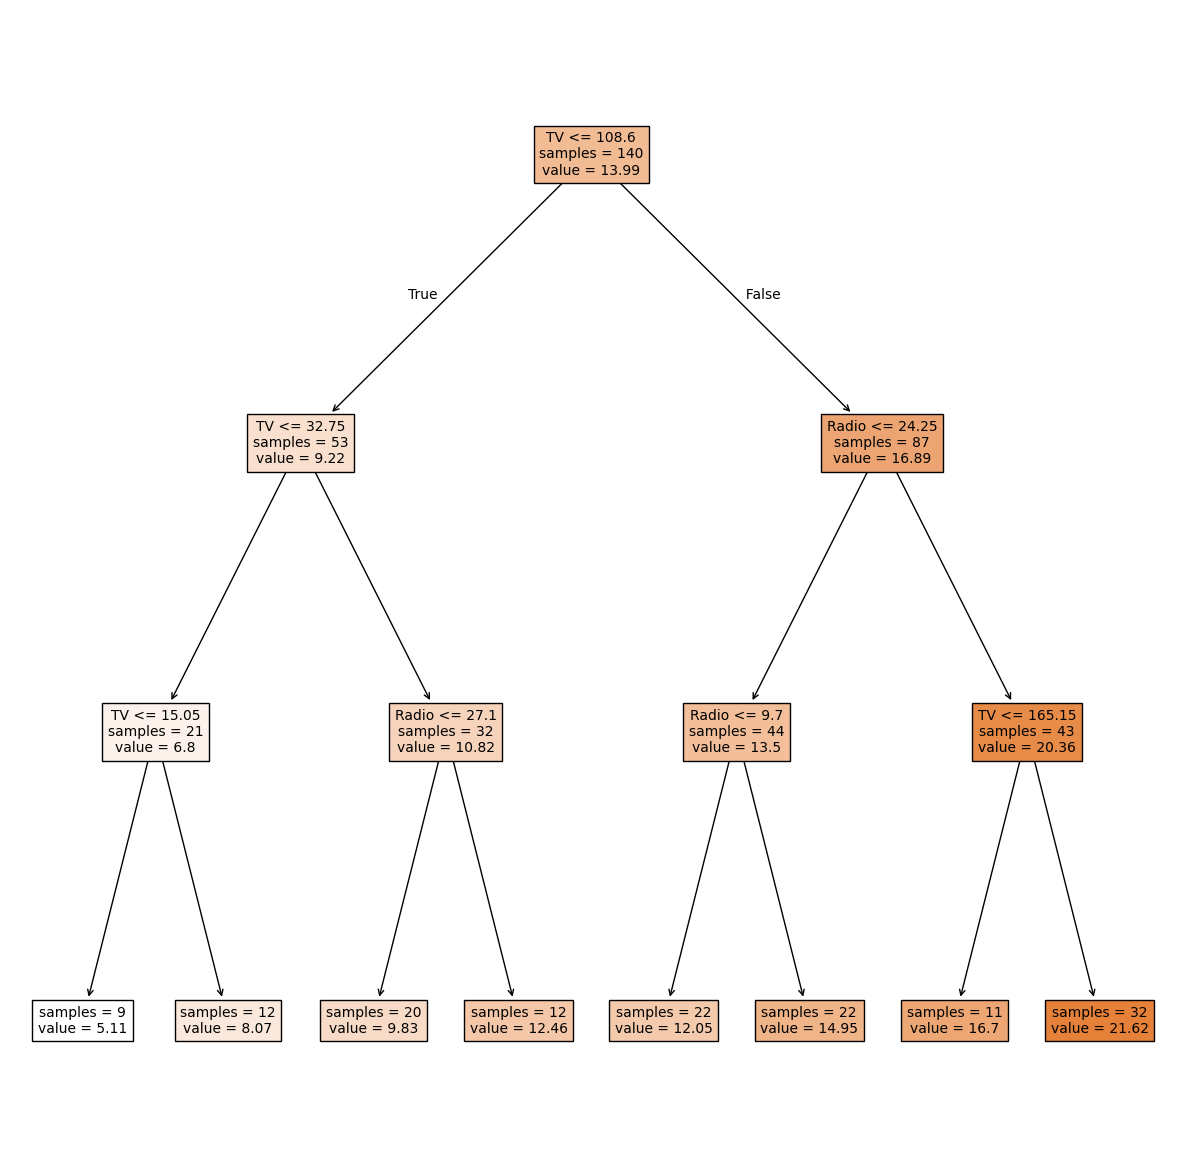

In [89]:
fig,ax=plt.subplots(figsize=(15,15))
plot_tree(
    decision_tree=modelo_ar,
    feature_names=datos.drop(columns="Sales").columns,
    filled=True,
    impurity=False,
    fontsize=10,
    precision=2,
    ax=ax
)


##4.3 predicciones
La importancia de cada predictor en el modelo se calcula como la reduccion total (normalizada) en el criterio de división. en este caso, el mse que consigue el predictor en las divisiones en las que participa. si un predictor no se ha selecionado en ninguna division, no se incluye en el modelo y su importancia es 0

In [92]:
importancia_predictores=pd.DataFrame(
    {
        "predictor":datos.drop(columns="Sales").columns,
        "importancia":modelo_ar.feature_importances_
    }
)

In [93]:
importancia_predictores.sort_values(by="importancia",ascending=False)

,predictor,importancia
0,TV,0.671405
1,Radio,0.328595
2,Newspaper,0.000000
3,Web,0.000000
